This study looks at annual differences in AQI between 1999, 2012, and 2020.
AQI values run from 0 to 500. The higher the AQI value, the greater the level of air pollution. Levels are as follows: <br>
Good: 0 to 50 <br>
Moderate: 51 to 100 <br>
Unhealthy for Sensitive Groups: 101 to 150 <br>
Unhealthy: 151 to 200 <br>
Very Unhealthy: 201 to 300 <br>
Hazardous: 301 and above

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Read in datafiles, perform exploratory data analysis, and clean data

In [236]:
AQI0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\annual_aqi_by_county_1999.csv') #read in 1999 csv

In [237]:
print(AQI0.info()) #provides basic information on data
print(AQI0.ndim) #provides dimensions
print(AQI0.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1077 non-null   object
 1   County                               1077 non-null   object
 2   Year                                 1077 non-null   int64 
 3   Days with AQI                        1077 non-null   int64 
 4   Good Days                            1077 non-null   int64 
 5   Moderate Days                        1077 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1077 non-null   int64 
 7   Unhealthy Days                       1077 non-null   int64 
 8   Very Unhealthy Days                  1077 non-null   int64 
 9   Hazardous Days                       1077 non-null   int64 
 10  Max AQI                              1077 non-null   int64 
 11  90th Percentile AQI                  1077 n

In [238]:
#There are 1077 rows and 19 columns. Because there are so many columns, look at the first five rows and first 10 columns
AQI0.iloc[:5, :10]

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days
0,Alabama,Clay,1999,273,117,97,49,10,0,0
1,Alabama,Colbert,1999,359,276,71,11,1,0,0
2,Alabama,DeKalb,1999,332,134,119,60,19,0,0
3,Alabama,Elmore,1999,241,157,71,12,1,0,0
4,Alabama,Escambia,1999,58,57,1,0,0,0,0


In [239]:
#Look at the first five rows and next 9 columns
AQI0.iloc[:5, 11:20]

,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,122,58,0,0,211,0,62,0
1,73,11,0,0,0,284,75,0
2,133,59,0,0,270,0,62,0
3,87,45,0,0,241,0,0,0
4,35,20,0,0,0,0,0,58


In [240]:
#See which states are represented
AQI0States = AQI0['State'].unique()
AQI0States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Canada',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [241]:
len(AQI0States)

55

In [242]:
print(np.count_nonzero(AQI0['State']== 'Canada' ))
print(np.count_nonzero(AQI0['State']== 'Country Of Mexico' ))
print(np.count_nonzero(AQI0['State']== 'Puerto Rico' ))
print(np.count_nonzero(AQI0['State']== 'District Of Columbia' ))
print(np.count_nonzero(AQI0['State']== 'Virgin Islands' ))

1
3
15
1
3


In [243]:
#Remove observations from non U.S. states
AQI0Cleaned = AQI0[(AQI0['State']!= 'Canada') & (AQI0['State']!='Country Of Mexico') 
                   & (AQI0['State']!='Puerto Rico') 
                   & (AQI0['State']!='District Of Columbia') 
                   & (AQI0['State']!='Virgin Islands') ]
           
len(AQI0Cleaned)

1054

In [244]:
#save cleaned dataset 
AQI0Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Cleaned_datasets\\annual_aqi_by_county_1999_cleaned.csv', header = True)

In [245]:
#is each county name in the dataframe unique
len(AQI0Cleaned['County'].unique())

793

In [246]:
#get a count of counties by state
AQI0Counties = AQI0Cleaned.groupby('State')['County'].nunique()

In [247]:
AQI0Counties.sort_values(ascending = False)

State
California        56
Ohio              53
North Carolina    51
Virginia          42
Kentucky          38
Indiana           37
Pennsylvania      35
Tennessee         33
Florida           33
Georgia           32
New York          32
Wisconsin         32
Colorado          30
Michigan          30
Texas             29
South Carolina    25
Illinois          25
Louisiana         24
Oklahoma          22
Alabama           22
Minnesota         21
Mississippi       20
Washington        20
Idaho             19
West Virginia     18
Arkansas          18
Iowa              17
New Jersey        17
New Mexico        16
Oregon            16
Montana           16
Missouri          16
Maryland          15
Wyoming           14
Maine             14
North Dakota      13
Nebraska          12
Arizona           12
Massachusetts     11
Kansas            10
New Hampshire     10
Utah               9
Connecticut        8
Nevada             7
Alaska             6
Vermont            4
Hawaii             4
South D

In [248]:
AQI1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\annual_aqi_by_county_2012.csv') #read in 2012 csv
print(AQI1.info()) 
print(AQI1.ndim) 
print(AQI1.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1071 non-null   object
 1   County                               1071 non-null   object
 2   Year                                 1071 non-null   int64 
 3   Days with AQI                        1071 non-null   int64 
 4   Good Days                            1071 non-null   int64 
 5   Moderate Days                        1071 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1071 non-null   int64 
 7   Unhealthy Days                       1071 non-null   int64 
 8   Very Unhealthy Days                  1071 non-null   int64 
 9   Hazardous Days                       1071 non-null   int64 
 10  Max AQI                              1071 non-null   int64 
 11  90th Percentile AQI                  1071 n

In [249]:
#See which states are represented
AQI1States = AQI1['State'].unique()
AQI1States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [250]:
len(AQI1States)

54

In [251]:
#Check if there are observations for non U.S. states found in 1999 dataset
print(np.count_nonzero(AQI1['State']== 'Canada' ))
print(np.count_nonzero(AQI1['State']== 'Country Of Mexico' ))
print(np.count_nonzero(AQI1['State']== 'Puerto Rico' ))
print(np.count_nonzero(AQI1['State']== 'District Of Columbia' ))
print(np.count_nonzero(AQI1['State']== 'Virgin Islands' ))

0
2
13
1
2


In [252]:
#Remove observations from non U.S. states
AQI1Cleaned = AQI1[(AQI1['State']!='Country Of Mexico') & (AQI1['State']!='Puerto Rico')
                   & (AQI1['State']!='District Of Columbia') 
                   & (AQI1['State']!='Virgin Islands') ]
len(AQI1Cleaned)

1053

In [253]:
#save cleaned dataset 
AQI1Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Cleaned_datasets\\annual_aqi_by_county_2012_cleaned.csv', header = True)

In [254]:
#is each county name in the dataframe unique
len(AQI1Cleaned['County'].unique())

802

In [255]:
#get a count of counties by state
AQI1Counties = AQI1Cleaned.groupby('State')['County'].nunique()
AQI1Counties.sort_values(ascending = False)

State
California        54
North Carolina    46
Texas             43
Ohio              42
Indiana           42
Florida           39
Virginia          38
Pennsylvania      38
New York          33
Wisconsin         32
Georgia           32
Colorado          31
Kentucky          29
Washington        29
Michigan          28
Illinois          26
Oregon            24
Tennessee         23
Louisiana         22
Oklahoma          22
Missouri          22
Minnesota         21
South Carolina    19
Montana           19
Wyoming           19
Iowa              19
New Mexico        18
Alabama           17
New Jersey        16
Idaho             15
Maryland          15
West Virginia     15
Utah              15
Arkansas          14
Kansas            13
Arizona           13
Massachusetts     12
Mississippi       11
Maine             11
Nebraska          11
Nevada            10
North Dakota       9
South Dakota       9
Connecticut        8
Alaska             8
New Hampshire      7
Vermont            4
Hawaii 

In [256]:
AQI2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\annual_aqi_by_county_2020.csv') #read in 2020 csv
print(AQI2.info()) 
print(AQI2.ndim) 
print(AQI2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1040 non-null   object
 1   County                               1040 non-null   object
 2   Year                                 1040 non-null   int64 
 3   Days with AQI                        1040 non-null   int64 
 4   Good Days                            1040 non-null   int64 
 5   Moderate Days                        1040 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1040 non-null   int64 
 7   Unhealthy Days                       1040 non-null   int64 
 8   Very Unhealthy Days                  1040 non-null   int64 
 9   Hazardous Days                       1040 non-null   int64 
 10  Max AQI                              1040 non-null   int64 
 11  90th Percentile AQI                  1040 n

In [257]:
#See which states are represented
AQI2States = AQI2['State'].unique()
AQI2States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [258]:
len(AQI2States)

54

In [259]:
#Check if there are observations for non U.S. states found in 1999 or 2012 datasets 
print(np.count_nonzero(AQI2['State']== 'Canada' ))
print(np.count_nonzero(AQI2['State']== 'Country Of Mexico' ))
print(np.count_nonzero(AQI2['State']== 'Puerto Rico' ))
print(np.count_nonzero(AQI2['State']== 'District Of Columbia' ))
print(np.count_nonzero(AQI2['State']== 'Virgin Islands' ))

0
2
11
1
3


In [260]:
#Remove observations from non U.S. states
AQI2Cleaned = AQI2[(AQI2['State']!='Country Of Mexico') & (AQI2['State']!='Puerto Rico')
                   & (AQI2['State']!='District Of Columbia') 
                   & (AQI2['State']!='Virgin Islands') ]
len(AQI2Cleaned)

1023

In [261]:
#save cleaned dataset 
AQI2Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Cleaned_datasets\\annual_aqi_by_county_2020_cleaned.csv', header = True)

In [262]:
#is each county name in the dataframe unique
len(AQI2Cleaned['County'].unique())

787

In [263]:
#get a count of counties by state
AQI2Counties = AQI2Cleaned.groupby('State')['County'].nunique()
AQI2Counties.sort_values(ascending = False)

State
California        53
Texas             52
Ohio              44
Pennsylvania      41
Florida           39
North Carolina    38
Indiana           36
Virginia          33
Washington        31
Georgia           29
New York          28
Wisconsin         28
Colorado          28
Kentucky          27
Michigan          27
Illinois          27
Missouri          24
Oregon            23
Louisiana         23
Tennessee         23
Idaho             21
Minnesota         21
Oklahoma          20
Montana           19
Wyoming           18
Maryland          17
Iowa              16
West Virginia     16
New Jersey        16
New Mexico        16
Utah              15
South Carolina    15
Alabama           15
Arizona           13
Massachusetts     13
Arkansas          11
Kansas            11
North Dakota      10
Maine             10
Mississippi       10
South Dakota      10
Nevada             9
Alaska             9
Nebraska           9
Connecticut        8
New Hampshire      7
Vermont            4
Hawaii 

## Which states have reports of hazardous AQI?

In [264]:
#read in aqs sites file and merge with AQI0 dataset to obtain lat and long for counties
#Need a new datafile from AQS on site information
sites = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\Original_datasets\\aqs_sites.csv')

In [265]:
sites.columns

Index(['State Code', 'County Code', 'Site Number', 'Latitude', 'Longitude',
       'Datum', 'Elevation', 'Land Use', 'Location Setting',
       'Site Established Date', 'Site Closed Date', 'Met Site State Code',
       'Met Site County Code', 'Met Site Site Number', 'Met Site Type',
       'Met Site Distance', 'Met Site Direction', 'GMT Offset',
       'Owning Agency', 'Local Site Name', 'Address', 'Zip Code', 'State Name',
       'County Name', 'City Name', 'CBSA Name', 'Tribe Name',
       'Extraction Date'],
      dtype='object')

In [266]:
#select State Name, County Name, Latitude, and Longitude from the sites df
cols = ['State Name', 'County Name', 'Latitude', 'Longitude']
sitesSubset = sites[cols]
sitesSubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20730 entries, 0 to 20729
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State Name   20730 non-null  object 
 1   County Name  20730 non-null  object 
 2   Latitude     20724 non-null  float64
 3   Longitude    20725 non-null  float64
dtypes: float64(2), object(2)
memory usage: 647.9+ KB


In [267]:
sitesSubset.head()

,State Name,County Name,Latitude,Longitude
0,Alabama,Autauga,32.437458,-86.472891
1,Alabama,Autauga,32.428470,-86.443585
2,Alabama,Autauga,32.332659,-86.791521
3,Alabama,Baldwin,0.000000,0.000000
4,Alabama,Baldwin,30.552367,-87.706911


In [268]:
#drop observations with Latitude or Longitude of 0
sitesSubsetNonMissing = sitesSubset[(sitesSubset['Longitude'] != 0) & (sitesSubset['Latitude'] != 0)]
len(sitesSubsetNonMissing)

19861

In [269]:
sitesSubsetNonMissing.head()

,State Name,County Name,Latitude,Longitude
0,Alabama,Autauga,32.437458,-86.472891
1,Alabama,Autauga,32.428470,-86.443585
2,Alabama,Autauga,32.332659,-86.791521
4,Alabama,Baldwin,30.552367,-87.706911
5,Alabama,Baldwin,30.555472,-87.713599


In [270]:
#check which States are included
sitesSubsetNonMissing['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands', 'Country Of Mexico', 'Canada'], dtype=object)

In [271]:
len(sitesSubsetNonMissing['State Name'].unique())

56

In [272]:
#remove District Of Columbia, Guam, Puerto Rico, Virgin Islands, Mexico, and Canada
sitesSubsetCleaned = sitesSubsetNonMissing[(sitesSubsetNonMissing['State Name'] != 'District Of Columbia') 
                & (sitesSubsetNonMissing['State Name'] != 'Guam')
                & (sitesSubsetNonMissing['State Name'] != 'Puerto Rico')
                & (sitesSubsetNonMissing['State Name'] != 'Virgin Islands')
                & (sitesSubsetNonMissing['State Name'] != 'Country Of Mexico')                  
                & (sitesSubsetNonMissing['State Name'] != 'Canada')]

In [273]:
len(sitesSubsetCleaned)

19618

In [274]:
#remove multiple rows for State/County having slightly different lat/longs, keeping the first 
sitesSubsetNonDuplicate = sitesSubsetCleaned.drop_duplicates(subset=['State Name', 'County Name'], keep = 'first')
sitesSubsetNonDuplicate.head()

,State Name,County Name,Latitude,Longitude
0,Alabama,Autauga,32.437458,-86.472891
4,Alabama,Baldwin,30.552367,-87.706911
7,Alabama,Barbour,31.891272,-85.135210
9,Alabama,Bibb,32.904048,-87.233057
10,Alabama,Blount,33.957020,-86.464443


In [275]:
len(sitesSubsetNonDuplicate)

2083

In [276]:
#rename columns for ease of merging
sitesSubsetNonDuplicate = sitesSubsetNonDuplicate.rename(columns={'State Name' : 'State', 'County Name' : 'County'})

In [277]:
#merge AQI0 dataset with sitesSubsetNonDuplicate
AQI0WithLatLong = pd.merge(AQI0Cleaned, sitesSubsetNonDuplicate, how='left', on=['State', 'County'])
AQI0WithLatLong

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,Clay,1999,273,117,97,49,10,0,0,...,122,58,0,0,211,0,62,0,33.284928,-85.803608
1,Alabama,Colbert,1999,359,276,71,11,1,0,0,...,73,11,0,0,0,284,75,0,34.737034,-87.886701
2,Alabama,DeKalb,1999,332,134,119,60,19,0,0,...,133,59,0,0,270,0,62,0,34.456508,-85.671628
3,Alabama,Elmore,1999,241,157,71,12,1,0,0,...,87,45,0,0,241,0,0,0,32.498567,-86.136587
4,Alabama,Escambia,1999,58,57,1,0,0,0,0,...,35,20,0,0,0,0,0,58,31.108815,-87.070940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,Wyoming,Platte,1999,60,60,0,0,0,0,0,...,30,13,0,0,0,0,0,60,42.114187,-104.939941
1050,Wyoming,Sheridan,1999,283,225,58,0,0,0,0,...,59,31,0,0,0,0,101,182,44.797161,-106.949853
1051,Wyoming,Sublette,1999,361,204,150,7,0,0,0,...,74,48,0,0,360,0,1,0,42.783266,-109.667417
1052,Wyoming,Sweetwater,1999,63,58,5,0,0,0,0,...,48,26,0,0,0,0,0,63,41.516889,-109.467396


In [278]:
#1999
AQI0Hazardous = AQI0WithLatLong[AQI0WithLatLong['Hazardous Days'] > 0].sort_values('Hazardous Days', ascending = False)
AQI0Hazardous

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
70,California,Inyo,1999,365,152,155,39,8,0,11,...,115,58,0,0,300,0,6,59,37.353540,-118.400943
1042,Wyoming,Carbon,1999,60,50,6,0,0,2,2,...,64,23,0,0,0,0,0,60,41.454401,-107.737619
119,Colorado,Delta,1999,61,57,3,0,0,0,1,...,44,23,0,0,0,0,0,61,38.743040,-108.070069
134,Colorado,Montrose,1999,107,86,20,0,0,0,1,...,55,31,0,0,0,0,0,107,38.477765,-107.876451
240,Idaho,Power,1999,327,40,172,60,51,3,1,...,159,82,0,0,0,0,272,55,42.782967,-112.855294
550,Nevada,Clark,1999,365,25,266,67,5,1,1,...,119,75,15,47,190,0,47,66,35.982202,-114.835819


In [279]:
#1999
AQI0Hazardous.groupby('State').sum().sort_values('Hazardous Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,1999,365,152,155,39,8,0,11,2797,115,58,0,0,300,0,6,59,37.353540,-118.400943
Colorado,3998,168,143,23,0,0,0,2,747,99,54,0,0,0,0,0,168,77.220805,-215.946520
Wyoming,1999,60,50,6,0,0,2,2,540,64,23,0,0,0,0,0,60,41.454401,-107.737619
Idaho,1999,327,40,172,60,51,3,1,489,159,82,0,0,0,0,272,55,42.782967,-112.855294
Nevada,1999,365,25,266,67,5,1,1,322,119,75,15,47,190,0,47,66,35.982202,-114.835819


In [280]:
#merge AQI1 dataset with sitesSubsetNonDuplicate
AQI1WithLatLong = pd.merge(AQI1Cleaned, sitesSubsetNonDuplicate, how='left', on=['State', 'County'])
AQI1WithLatLong

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,Baldwin,2012,284,226,56,2,0,0,0,...,61,38,0,0,210,0,74,0,30.552367,-87.706911
1,Alabama,Clay,2012,121,99,22,0,0,0,0,...,56,35,0,0,0,0,121,0,33.284928,-85.803608
2,Alabama,Colbert,2012,283,222,55,6,0,0,0,...,62,40,0,0,209,0,74,0,34.737034,-87.886701
3,Alabama,DeKalb,2012,361,282,74,5,0,0,0,...,64,40,0,0,320,0,41,0,34.456508,-85.671628
4,Alabama,Elmore,2012,245,212,33,0,0,0,0,...,54,40,0,0,245,0,0,0,32.498567,-86.136587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,Wyoming,Sublette,2012,366,206,145,9,6,0,0,...,79,48,0,0,327,0,39,0,42.783266,-109.667417
1049,Wyoming,Sweetwater,2012,366,213,145,7,0,1,0,...,77,47,0,2,296,9,12,47,41.516889,-109.467396
1050,Wyoming,Teton,2012,366,258,105,3,0,0,0,...,67,44,1,0,351,0,12,2,43.699919,-110.734129
1051,Wyoming,Uinta,2012,366,254,111,1,0,0,0,...,71,44,0,0,352,0,0,14,41.266890,-110.975738


In [281]:
#2012
AQI1Hazardous = AQI1WithLatLong[AQI1WithLatLong['Hazardous Days'] > 0].sort_values('Hazardous Days', ascending = False)
AQI1Hazardous

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
75,California,Mono,2012,366,326,16,5,5,0,14,...,54,17,0,0,0,0,21,345,37.645710,-118.966520
65,California,Inyo,2012,366,204,133,15,4,2,8,...,93,48,0,0,280,0,10,76,37.353540,-118.400943
547,Nevada,Washoe,2012,366,144,202,12,0,0,8,...,88,56,0,21,244,0,79,22,39.526578,-119.799080
575,New Mexico,Dona Ana,2012,366,149,186,23,1,1,6,...,97,54,0,8,228,0,11,119,32.003712,-106.602215
34,Arizona,Pinal,2012,366,49,234,69,7,3,4,...,124,75,0,0,111,0,8,247,32.877583,-111.752222
748,Oregon,Deschutes,2012,366,303,45,1,12,1,4,...,61,35,0,0,127,0,239,0,44.060939,-121.310290
581,New Mexico,Luna,2012,364,224,129,7,0,1,3,...,77,46,0,3,324,0,0,37,32.267309,-107.755863
869,Texas,El Paso,2012,366,113,229,19,2,1,2,...,92,58,0,21,154,0,173,18,31.760942,-106.483875
219,Hawaii,Hawaii,2012,366,0,27,114,221,3,1,...,200,171,0,0,0,358,8,0,19.496968,-155.497221
961,Washington,Chelan,2012,366,260,81,10,13,1,1,...,76,31,0,0,0,0,366,0,47.420937,-120.322273


In [282]:
#2012
AQI1Hazardous.groupby('State').sum().sort_values('Hazardous Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,4024,732,530,149,20,9,2,22,7680,147,65,0,0,280,0,31,421,74.999250,-237.367463
New Mexico,4024,730,373,315,30,1,2,9,2629,174,100,0,11,552,0,11,156,64.271021,-214.358078
Nevada,2012,366,144,202,12,0,0,8,895,88,56,0,21,244,0,79,22,39.526578,-119.799080
Arizona,2012,366,49,234,69,7,3,4,594,124,75,0,0,111,0,8,247,32.877583,-111.752222
Oregon,2012,366,303,45,1,12,1,4,546,61,35,0,0,127,0,239,0,44.060939,-121.310290
Texas,2012,366,113,229,19,2,1,2,643,92,58,0,21,154,0,173,18,31.760942,-106.483875
Hawaii,2012,366,0,27,114,221,3,1,322,200,171,0,0,0,358,8,0,19.496968,-155.497221
Washington,2012,366,260,81,10,13,1,1,347,76,31,0,0,0,0,366,0,47.420937,-120.322273


In [283]:
#merge AQI2 dataset with sitesSubsetNonDuplicate
AQI2WithLatLong = pd.merge(AQI2Cleaned, sitesSubsetNonDuplicate, how='left', on=['State', 'County'])
AQI2WithLatLong

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,Baldwin,2020,269,250,19,0,0,0,0,...,49,36,0,0,198,0,71,0,30.552367,-87.706911
1,Alabama,Clay,2020,108,99,9,0,0,0,0,...,49,26,0,0,0,0,108,0,33.284928,-85.803608
2,Alabama,DeKalb,2020,364,350,14,0,0,0,0,...,45,36,0,0,331,0,33,0,34.456508,-85.671628
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,...,41,31,0,0,197,0,0,0,32.498567,-86.136587
4,Alabama,Etowah,2020,278,260,18,0,0,0,0,...,46,34,0,0,204,0,74,0,33.999819,-86.107475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Wyoming,Sublette,2020,366,297,64,4,1,0,0,...,61,44,0,0,355,0,11,0,42.783266,-109.667417
1019,Wyoming,Sweetwater,2020,366,238,116,7,4,0,1,...,76,46,0,5,253,0,7,101,41.516889,-109.467396
1020,Wyoming,Teton,2020,366,318,36,7,5,0,0,...,54,42,0,0,329,0,37,0,43.699919,-110.734129
1021,Wyoming,Uinta,2020,366,323,41,2,0,0,0,...,51,40,0,2,225,0,0,139,41.266890,-110.975738


In [284]:
#2020
AQI2Hazardous = AQI2WithLatLong[AQI2WithLatLong['Hazardous Days'] > 0].sort_values('Hazardous Days', ascending = False)
AQI2Hazardous

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
70,California,Mono,2020,366,211,90,12,17,10,26,...,199,40,0,0,0,0,304,62,37.645710,-118.966520
727,Oregon,Marion,2020,365,302,52,1,1,0,9,...,58,32,0,0,131,0,234,0,44.949842,-123.049541
60,California,Inyo,2020,366,172,139,23,19,5,8,...,130,52,0,0,228,0,116,22,37.353540,-118.400943
725,Oregon,Lane,2020,366,246,106,4,0,2,8,...,75,40,0,0,104,0,257,5,43.796756,-123.062001
722,Oregon,Josephine,2020,366,273,67,4,15,0,7,...,73,26,0,0,0,0,366,0,42.442878,-123.325594
716,Oregon,Deschutes,2020,366,317,35,4,2,1,7,...,55,18,0,0,0,0,366,0,44.060939,-121.310290
726,Oregon,Linn,2020,366,283,72,0,1,3,7,...,63,27,0,0,0,0,366,0,44.638139,-123.097853
717,Oregon,Douglas,2020,366,313,43,1,1,2,6,...,57,22,0,0,0,0,366,0,43.254814,-123.350888
957,Washington,Walla Walla,2020,366,330,27,0,2,1,6,...,50,22,0,0,0,0,143,223,46.065958,-118.345240
935,Washington,Clark,2020,366,312,45,1,1,2,5,...,58,27,0,0,66,0,300,0,45.585364,-122.413129


In [285]:
AQI2Hazardous.groupby('State').sum().sort_values('Hazardous Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
Oregon,36360,6474,5124,1117,51,66,33,83,8779,1145,518,0,11,1046,0,5403,14,796.756947,-2193.080098
California,22220,4020,2208,1245,289,179,46,53,6741,1263,545,0,0,1912,0,1904,204,419.242959,-1325.597026
Washington,24240,4309,3615,572,19,34,27,42,6389,656,324,0,0,528,0,3416,365,564.106429,-1444.280638
Idaho,10100,1813,1514,257,7,17,13,5,1797,277,118,0,0,0,0,1803,10,235.667471,-583.357080
Arizona,4040,732,354,292,78,5,0,3,1445,188,116,0,0,378,0,106,248,65.601551,-226.376622
New Mexico,4040,720,503,195,15,3,1,3,760,128,72,0,7,237,0,39,437,64.271021,-214.358078
Montana,2020,366,217,140,2,4,2,1,327,71,40,0,0,0,0,357,9,48.460426,-115.893542
Nevada,2020,356,308,39,5,3,0,1,331,59,38,0,0,302,0,0,54,38.985185,-119.185425
Wyoming,2020,366,238,116,7,4,0,1,1250,76,46,0,5,253,0,7,101,41.516889,-109.467396


## Which states have reports of very unhealthy AQI?

In [286]:
#1991
AQI0VUnhealthy = AQI0WithLatLong[AQI0WithLatLong['Very Unhealthy Days'] > 0].sort_values('Very Unhealthy Days', ascending = False)
AQI0VUnhealthy

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
92,California,San Bernardino,1999,365,16,163,85,72,29,0,...,190,101,0,93,206,0,61,5,34.893980,-117.024804
902,Texas,Harris,1999,365,120,148,43,30,24,0,...,185,63,1,78,190,55,30,11,29.723056,-94.945833
214,Georgia,Rockdale,1999,363,240,47,37,24,15,0,...,156,34,0,154,209,0,0,0,33.588545,-84.069608
71,California,Kern,1999,365,62,107,72,111,13,0,...,179,108,0,40,240,0,81,4,35.383592,-119.017598
205,Georgia,Fulton,1999,365,72,193,48,39,13,0,...,164,71,2,41,114,31,172,5,33.752625,-84.383325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Illinois,Champaign,1999,365,253,74,31,6,1,0,...,101,43,0,0,325,12,27,1,40.116143,-88.241438
245,Illinois,Cook,1999,365,67,202,82,13,1,0,...,120,74,0,77,60,178,43,7,41.670992,-87.732457
257,Illinois,Madison,1999,365,73,168,106,17,1,0,...,133,80,0,0,106,217,28,14,38.668105,-89.994271
276,Indiana,Floyd,1999,365,165,121,67,11,1,0,...,123,54,0,0,142,183,40,0,38.230070,-85.848297


In [287]:
#1991
AQI0VUnhealthy.groupby('State').sum().sort_values('Very Unhealthy Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,41979,7637,3057,2439,1304,743,94,0,4434,2914,1416,88,1222,5252,19,957,99,770.475641,-2519.054238
Georgia,21989,3015,1284,943,452,265,71,0,2419,1700,643,8,338,2046,31,557,35,369.186533,-927.751285
Texas,21989,3705,2091,1024,357,178,55,0,2436,1336,517,1,329,2811,316,219,29,347.934136,-1055.664006
Pennsylvania,43978,7341,3532,2585,859,321,44,0,4635,2600,1208,34,1518,3139,1651,991,8,889.942067,-1705.253572
Maryland,21989,3116,1830,733,322,189,42,0,2355,1484,520,24,163,2578,163,156,32,431.058681,-843.347780
New Jersey,19990,3541,2254,888,207,151,41,0,2156,1102,435,181,754,2119,134,349,4,403.274927,-744.918299
North Carolina,11994,1878,749,727,247,129,26,0,1300,821,362,26,41,1052,180,579,0,213.926803,-480.205032
Ohio,31984,4996,2275,1965,573,159,24,0,3350,1877,841,15,34,2795,826,1186,140,645.715228,-1323.880744
Tennessee,21989,3365,1187,1239,677,242,20,0,2276,1551,722,67,51,2487,268,487,5,393.805299,-942.892277


In [288]:
#2012
AQI1VUnhealthy = AQI1WithLatLong[AQI1WithLatLong['Very Unhealthy Days'] > 0].sort_values('Very Unhealthy Days', ascending = False)
AQI1VUnhealthy

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
234,Idaho,Lemhi,2012,362,198,118,16,20,10,0,...,110,44,0,0,0,0,362,0,45.169089,-113.867567
85,California,San Bernardino,2012,366,50,173,84,51,8,0,...,169,90,0,17,227,0,113,9,34.893980,-117.024804
520,Montana,Ravalli,2012,354,257,56,11,26,4,0,...,118,27,0,0,0,0,354,0,46.244328,-114.158166
34,Arizona,Pinal,2012,366,49,234,69,7,3,4,...,124,75,0,0,111,0,8,247,32.877583,-111.752222
286,Indiana,LaPorte,2012,366,277,64,18,4,3,0,...,87,35,0,0,172,128,66,0,41.608376,-86.719467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Maryland,Baltimore,2012,366,245,96,23,1,1,0,...,88,42,0,69,245,1,51,0,39.489746,-76.654383
403,Maryland,Calvert,2012,211,142,54,13,1,1,0,...,90,45,0,0,211,0,0,0,38.070128,-76.458564
30,Arizona,Maricopa,2012,366,46,252,61,6,1,0,...,115,70,0,25,205,0,59,77,33.420631,-112.344345
410,Maryland,Harford,2012,360,201,137,17,4,1,0,...,81,48,0,0,172,0,188,0,39.536218,-76.348293


In [289]:
AQI1VUnhealthy.groupby('State').sum().sort_values('Very Unhealthy Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,22132,4003,1291,1750,667,267,20,8,5970,1391,741,2,114,2109,0,1620,158,400.973523,-1312.827082
Idaho,6036,1089,800,223,26,27,13,0,747,225,94,6,25,215,1,774,68,134.691345,-346.299522
Texas,16096,2914,1769,963,148,22,10,2,2113,690,363,0,66,1959,19,838,32,251.313096,-778.857158
Michigan,10060,1396,810,454,117,9,6,0,1023,511,227,0,13,767,227,347,42,211.433777,-421.125003
Indiana,8048,1460,831,562,53,8,6,0,839,339,186,0,12,522,140,754,32,166.601800,-347.073391
Kentucky,8048,1341,743,476,103,15,4,0,809,385,193,1,26,773,79,461,1,152.693848,-344.255442
Maryland,8048,1302,869,353,67,9,4,0,819,330,174,5,69,938,1,289,0,155.666767,-305.537569
Arizona,4024,732,95,486,130,13,4,4,862,239,145,0,25,316,0,67,324,66.298214,-224.096567
Montana,2012,354,257,56,11,26,4,0,286,118,27,0,0,0,0,354,0,46.244328,-114.158166


In [290]:
#2020
AQI2VUnhealthy = AQI2WithLatLong[AQI2WithLatLong['Very Unhealthy Days'] > 0].sort_values('Very Unhealthy Days', ascending = False)
AQI2VUnhealthy

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
29,Arizona,Maricopa,2020,366,14,151,60,67,74,0,...,215,112,0,0,273,0,55,38,33.420631,-112.344345
80,California,San Bernardino,2020,366,50,153,76,69,18,0,...,185,93,0,17,228,0,106,15,34.893980,-117.024804
64,California,Los Angeles,2020,366,60,170,76,44,16,0,...,164,83,0,23,209,0,129,5,34.104175,-118.409246
76,California,Plumas,2020,360,183,127,16,20,10,4,...,146,49,0,0,0,0,360,0,39.768510,-120.616330
70,California,Mono,2020,366,211,90,12,17,10,26,...,199,40,0,0,0,0,304,62,37.645710,-118.966520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,California,Mendocino,2020,366,280,63,10,10,1,2,...,76,34,0,0,179,0,182,5,39.435168,-123.809460
66,California,Marin,2020,366,315,42,4,4,1,0,...,56,32,0,18,212,0,136,0,37.972310,-122.520004
54,California,Del Norte,2020,274,232,33,5,3,1,0,...,55,32,0,0,0,0,274,0,41.752893,-124.199525
48,California,Alameda,2020,366,236,110,8,11,1,0,...,79,43,0,13,155,0,198,0,37.876870,-122.266913


In [291]:
AQI2VUnhealthy.groupby('State').sum().sort_values('Very Unhealthy Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,50500,9052,4773,2858,790,470,109,52,9775,2762,1326,0,85,4675,0,3980,312,936.195183,-3013.519663
Arizona,4040,732,168,350,72,67,75,0,559,292,165,0,0,475,0,100,157,65.802667,-225.201798
Washington,54540,9688,8551,878,47,106,68,38,9663,1311,644,0,64,1168,127,8001,328,1269.806017,-3258.433103
Oregon,30300,5387,4403,791,45,46,40,62,7179,919,422,0,11,1048,0,4310,18,667.168376,-1828.536439
Idaho,10100,1813,1514,257,7,17,13,5,1797,277,118,0,0,0,0,1803,10,235.667471,-583.357080
Nevada,4040,732,550,141,17,20,4,0,489,145,63,0,4,259,0,462,7,78.479259,-239.577577
Montana,4040,732,545,170,3,10,3,1,554,122,63,0,0,0,0,703,29,96.044189,-231.204547
New Mexico,4040,732,303,399,22,4,2,2,614,165,107,0,7,437,0,122,166,67.089591,-213.247240
Colorado,2020,350,327,19,1,2,1,0,238,42,17,0,0,0,0,0,350,38.090949,-102.613912


## Which states have reports of unhealthy AQI?

In [292]:
#1991
AQI0Unhealthy = AQI0WithLatLong[AQI0WithLatLong['Unhealthy Days'] > 0].sort_values('Unhealthy Days', ascending = False)
AQI0Unhealthy

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
71,California,Kern,1999,365,62,107,72,111,13,0,...,179,108,0,40,240,0,81,4,35.383592,-119.017598
66,California,Fresno,1999,365,59,106,88,106,6,0,...,182,108,7,38,231,0,89,0,36.145789,-120.359316
110,California,Tulare,1999,365,105,88,78,86,8,0,...,181,97,1,55,248,0,61,0,36.194406,-119.092610
92,California,San Bernardino,1999,365,16,163,85,72,29,0,...,190,101,0,93,206,0,61,5,34.893980,-117.024804
89,California,Riverside,1999,365,54,142,101,62,6,0,...,166,95,1,67,201,0,90,6,33.925865,-116.876137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,Minnesota,Mille Lacs,1999,246,199,37,9,1,0,0,...,77,37,0,0,227,0,4,15,46.205300,-93.759450
866,Tennessee,Humphreys,1999,360,316,29,14,1,0,0,...,59,11,0,0,0,360,0,0,36.017560,-87.970865
485,Mississippi,Adams,1999,235,107,90,37,1,0,0,...,115,55,0,0,177,0,58,0,31.541029,-91.398181
492,Mississippi,Hinds,1999,365,220,122,22,1,0,0,...,91,44,31,0,187,12,76,59,32.302399,-90.185368


In [293]:
AQI0Unhealthy.groupby('State').sum().sort_values('Unhealthy Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,79960,14322,7037,4267,1971,943,93,11,10379,4807,2322,150,2306,9725,23,1803,315,1498.078096,-4820.951036
Pennsylvania,63968,10593,5620,3418,1121,390,44,0,6385,3582,1644,35,1771,5293,2264,1222,8,1298.865463,-2485.995625
Ohio,79960,12167,6132,4210,1431,370,24,0,7769,4588,1978,21,51,6758,2740,2273,324,1612.359904,-3308.087777
Tennessee,47976,7650,3597,2405,1262,366,20,0,4736,3019,1331,99,290,4523,2011,667,60,861.174686,-2052.978910
North Carolina,65967,9236,4827,3012,1028,343,26,0,6204,3791,1731,243,41,6583,660,1669,40,1177.791392,-2633.751354
Georgia,43978,5535,2609,1848,690,317,71,0,4306,2880,1214,8,338,3258,676,1151,104,738.039001,-1849.449306
Kentucky,59970,9208,4756,2910,1234,294,14,0,5635,3557,1558,147,794,6133,1170,813,151,1132.604249,-2563.504057
Indiana,49975,7471,3963,2209,1028,269,2,0,4624,2955,1232,175,414,3581,2436,763,102,990.582178,-2163.413683
Texas,35982,6225,3613,1763,566,228,55,0,3725,2019,834,33,529,4627,587,342,107,558.647615,-1740.993539


In [294]:
#2012
AQI1Unhealthy = AQI1WithLatLong[AQI1WithLatLong['Unhealthy Days'] > 0].sort_values('Unhealthy Days', ascending = False)
AQI1Unhealthy

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
219,Hawaii,Hawaii,2012,366,0,27,114,221,3,1,...,200,171,0,0,0,358,8,0,19.496968,-155.497221
82,California,Riverside,2012,366,21,178,113,53,1,0,...,156,94,0,1,185,0,136,44,33.925865,-116.876137
85,California,San Bernardino,2012,366,50,173,84,51,8,0,...,169,90,0,17,227,0,113,9,34.893980,-117.024804
66,California,Kern,2012,366,64,160,92,49,1,0,...,154,84,0,0,218,0,143,5,35.383592,-119.017598
61,California,Fresno,2012,366,77,155,92,41,1,0,...,151,80,0,1,222,0,143,0,36.145789,-120.359316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,North Carolina,Granville,2012,214,166,43,4,1,0,0,...,71,42,0,0,214,0,0,0,36.141111,-78.768056
644,North Carolina,Guilford,2012,364,264,92,7,1,0,0,...,67,43,0,0,176,0,188,0,36.062587,-79.782272
648,North Carolina,Johnston,2012,263,217,40,5,1,0,0,...,58,40,0,0,200,0,63,0,35.499817,-78.342230
650,North Carolina,Lincoln,2012,213,142,64,6,1,0,0,...,74,46,0,0,213,0,0,0,35.489822,-81.253152


In [295]:
AQI1Unhealthy.groupby('State').sum().sort_values('Unhealthy Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,62372,11316,5247,4369,1289,369,20,22,13032,3277,1736,2,189,7174,1,3350,600,1153.670344,-3723.222923
Hawaii,2012,366,0,27,114,221,3,1,322,200,171,0,0,0,358,8,0,19.496968,-155.497221
Ohio,62372,9922,5707,3656,486,70,3,0,5527,2688,1455,44,2,5488,422,3926,40,1252.410929,-2568.912041
Wisconsin,36216,4968,3301,1339,266,62,0,0,3161,1636,770,0,10,3338,33,1579,8,783.745292,-1589.727955
Missouri,28168,4174,2241,1502,372,59,0,0,2392,1404,681,0,35,2328,236,1362,213,539.886025,-1294.158676
Michigan,38228,5064,3386,1246,369,57,6,0,3467,1831,811,0,13,3589,349,1067,46,815.117626,-1609.246822
Texas,36216,6566,4299,1950,259,47,9,2,3731,1472,797,0,112,4694,26,1701,33,571.201461,-1749.436370
Illinois,24144,3882,2591,1012,230,47,2,0,2237,1072,487,0,109,2728,415,619,11,479.986196,-1070.235374
Montana,6036,1083,613,369,51,46,4,0,638,313,119,0,0,56,0,947,80,139.112482,-340.667773


In [296]:
#2020
AQI2Unhealthy = AQI2WithLatLong[AQI2WithLatLong['Unhealthy Days'] > 0].sort_values('Unhealthy Days', ascending = False)
AQI2Unhealthy

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
487,Missouri,New Madrid,2020,366,59,74,154,79,0,0,...,168,117,0,0,0,366,0,0,36.587027,-89.546742
80,California,San Bernardino,2020,366,50,153,76,69,18,0,...,185,93,0,17,228,0,106,15,34.893980,-117.024804
29,Arizona,Maricopa,2020,366,14,151,60,67,74,0,...,215,112,0,0,273,0,55,38,33.420631,-112.344345
64,California,Los Angeles,2020,366,60,170,76,44,16,0,...,164,83,0,23,209,0,129,5,34.104175,-118.409246
77,California,Riverside,2020,366,53,168,98,36,9,2,...,159,87,0,0,224,0,103,39,33.925865,-116.876137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Illinois,Lake,2020,241,199,31,10,1,0,0,...,74,39,0,0,241,0,0,0,42.177247,-87.864791
118,Colorado,Larimer,2020,366,223,125,17,1,0,0,...,87,48,0,0,320,0,46,0,40.583650,-105.080162
129,Connecticut,Fairfield,2020,366,256,97,12,1,0,0,...,80,44,0,14,191,0,161,0,41.180375,-73.192890
717,Oregon,Douglas,2020,366,313,43,1,1,2,6,...,57,22,0,0,0,0,366,0,43.254814,-123.350888


In [297]:
AQI2Unhealthy.groupby('State').sum().sort_values('Unhealthy Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,103020,18506,10971,5486,1141,746,109,53,14958,4840,2475,3,143,10357,1,7372,630,1915.377357,-6161.151385
Washington,56560,10054,8820,966,48,110,68,42,10199,1374,676,0,64,1168,127,8330,365,1318.349480,-3376.340602
Oregon,36360,6486,5250,1000,59,91,29,57,7443,1109,488,0,0,644,0,5738,104,795.501563,-2178.806209
Missouri,6060,1098,536,321,160,81,0,0,512,295,203,0,32,122,366,463,115,114.104892,-274.289301
Arizona,8080,1458,577,578,151,76,74,2,1745,480,265,0,0,717,44,281,416,131.078631,-445.804744
Idaho,34340,6158,4998,1005,70,67,13,5,3873,996,467,0,22,510,134,5350,142,765.629900,-1959.954801
Montana,24240,4341,3602,647,46,42,3,1,2217,688,377,3,10,1501,9,2524,294,559.630796,-1339.003771
Nevada,12120,2186,1611,477,57,36,4,1,1386,404,224,0,21,1035,0,691,439,231.490086,-711.285780
Texas,34340,5986,4228,1582,151,25,0,0,2820,1184,629,0,89,2383,765,2734,15,509.338140,-1674.889398


## Which states have reports of unhealthy for sensitive individuals AQI?

In [298]:
#1991
AQI0USensitiveGroups = AQI0WithLatLong[AQI0WithLatLong['Unhealthy for Sensitive Groups Days'] > 0].sort_values('Unhealthy for Sensitive Groups Days', 
        ascending = False)
AQI0USensitiveGroups

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
32,Arizona,Maricopa,1999,365,5,168,170,22,0,0,...,140,101,3,125,218,0,7,12,33.420631,-112.344345
996,West Virginia,Hancock,1999,365,29,151,158,27,0,0,...,137,101,0,0,43,302,19,1,40.493354,-80.603396
75,California,Los Angeles,1999,365,17,180,140,27,1,0,...,140,97,14,168,85,3,91,4,34.104175,-118.409246
881,Tennessee,Sullivan,1999,365,80,149,123,13,0,0,...,133,87,3,10,118,211,23,0,36.571495,-82.189022
789,Pennsylvania,Beaver,1999,365,87,128,119,29,2,0,...,144,89,0,24,91,250,0,0,40.633630,-80.510614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,North Carolina,Cabarrus,1999,114,45,68,1,0,0,0,...,85,53,0,0,0,0,110,4,35.411212,-80.581188
500,Mississippi,Rankin,1999,99,29,69,1,0,0,0,...,86,58,0,0,0,0,99,0,32.275528,-90.132528
651,North Carolina,Gaston,1999,117,45,71,1,0,0,0,...,87,54,0,0,0,0,116,1,35.246494,-81.037313
665,North Carolina,Mitchell,1999,116,45,70,1,0,0,0,...,81,54,0,0,0,0,110,6,35.915278,-82.073333


In [299]:
AQI0USensitiveGroups.groupby('State').sum().sort_values('Unhealthy for Sensitive Groups Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,99950,17590,9430,5008,2105,942,94,11,11629,5525,2729,175,2642,12206,169,2010,388,1874.231484,-6037.841646
Ohio,91954,13566,7222,4442,1508,370,24,0,8532,5046,2138,21,51,6758,3842,2373,521,1851.164825,-3801.283738
Tennessee,59970,9294,4875,2738,1295,366,20,0,5469,3413,1533,99,478,4523,2776,959,459,1076.880405,-2572.453547
Kentucky,61969,9322,4800,2976,1238,294,14,0,5749,3641,1614,147,794,6133,1170,922,156,1169.604047,-2649.962369
Pennsylvania,69965,11678,6531,3557,1156,390,44,0,6813,3771,1735,54,1771,5860,2763,1222,8,1422.493221,-2718.043512
Indiana,67966,9882,5901,2598,1112,269,2,0,5773,3594,1508,175,466,3733,4434,943,131,1347.872282,-2942.597520
North Carolina,93953,11375,6000,3902,1104,343,26,0,7900,4969,2421,375,41,7323,660,2852,124,1675.072713,-3747.788842
Virginia,57971,7893,4585,2332,761,206,9,0,5009,3099,1368,160,1538,4431,424,1319,21,1095.423494,-2259.589529
Georgia,55972,6608,3296,2192,732,317,71,0,5040,3366,1503,8,338,3431,1132,1563,136,935.830769,-2350.897333


In [300]:
AQI1USensitiveGroups = AQI1WithLatLong[AQI1WithLatLong['Unhealthy for Sensitive Groups Days'] > 0].sort_values('Unhealthy for Sensitive Groups Days', 
        ascending = False)
AQI1USensitiveGroups

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
28,Arizona,Gila,2012,366,53,154,134,25,0,0,...,132,92,0,0,81,251,1,33,33.446944,-110.840833
219,Hawaii,Hawaii,2012,366,0,27,114,221,3,1,...,200,171,0,0,0,358,8,0,19.496968,-155.497221
82,California,Riverside,2012,366,21,178,113,53,1,0,...,156,94,0,1,185,0,136,44,33.925865,-116.876137
102,California,Tulare,2012,366,91,137,98,40,0,0,...,151,80,0,0,243,0,122,1,36.194406,-119.092610
69,California,Los Angeles,2012,366,33,203,93,35,2,0,...,151,84,0,23,176,0,165,2,34.104175,-118.409246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Indiana,Jackson,2012,148,124,23,1,0,0,0,...,61,42,0,0,148,0,0,0,38.920835,-86.080523
735,Oklahoma,Muskogee,2012,333,303,29,1,0,0,0,...,49,27,0,0,0,52,0,281,35.747322,-95.628870
299,Indiana,Tippecanoe,2012,353,128,224,1,0,0,0,...,72,54,0,0,0,0,353,0,40.418091,-86.890842
305,Indiana,Whitley,2012,307,230,76,1,0,0,0,...,62,33,0,0,0,0,307,0,41.122988,-85.342146


In [301]:
AQI1USensitiveGroups.groupby('State').sum().sort_values('Unhealthy for Sensitive Groups Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,92552,16210,8649,5754,1396,369,20,22,14969,4341,2368,2,301,10501,5,4796,605,1721.778772,-5541.278946
Ohio,72432,11551,6927,4013,538,70,3,0,6185,3020,1614,44,2,6121,1167,4177,40,1451.224969,-2975.068211
Pennsylvania,76456,13522,8547,4472,461,42,0,0,5627,2841,1664,3,75,7994,512,4824,114,1543.119736,-2949.946868
Michigan,52312,6939,4871,1546,459,57,6,0,4433,2349,1077,0,38,5070,350,1435,46,1123.763815,-2204.081026
Missouri,40240,5942,3509,1937,437,59,0,0,3241,1867,901,0,35,3368,625,1584,330,768.620664,-1847.514405
Indiana,68408,9736,5975,3295,422,38,6,0,5188,2742,1465,22,23,4784,1493,3358,56,1351.715782,-2940.662288
Colorado,44264,7275,4421,2457,369,27,1,0,3249,1836,1063,2,240,5888,8,230,907,862.074732,-2333.843578
Texas,64384,11196,7832,2948,357,47,10,2,5698,2368,1336,0,123,7866,43,3121,43,1008.700450,-3113.197996
Arizona,24144,4021,2065,1558,350,40,4,4,2200,1050,627,0,39,2331,251,243,1157,402.457982,-1346.262626


In [302]:
AQI2USensitiveGroups = AQI2WithLatLong[AQI2WithLatLong['Unhealthy for Sensitive Groups Days'] > 0].sort_values('Unhealthy for Sensitive Groups Days', 
        ascending = False)
AQI2USensitiveGroups

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
487,Missouri,New Madrid,2020,366,59,74,154,79,0,0,...,168,117,0,0,0,366,0,0,36.587027,-89.546742
97,California,Tulare,2020,366,79,156,100,29,2,0,...,143,78,0,0,188,0,162,16,36.194406,-119.092610
77,California,Riverside,2020,366,53,168,98,36,9,2,...,159,87,0,0,224,0,103,39,33.925865,-116.876137
61,California,Kern,2020,366,78,159,97,30,2,0,...,140,81,0,0,206,0,143,17,35.383592,-119.017598
33,Arizona,Pinal,2020,366,97,186,76,5,0,2,...,119,72,0,0,143,0,36,187,32.877583,-111.752222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Oklahoma,Washington,2020,344,299,44,1,0,0,0,...,56,40,0,0,220,0,124,0,36.749238,-95.979720
276,Indiana,Howard,2020,366,319,46,1,0,0,0,...,53,38,0,0,257,0,109,0,40.496971,-86.124967
714,Oregon,Columbia,2020,363,342,12,1,4,4,0,...,40,25,0,0,133,0,230,0,46.087023,-122.934268
271,Indiana,Gibson,2020,363,348,14,1,0,0,0,...,26,3,0,0,0,363,0,0,38.361443,-87.748631


In [303]:
AQI2USensitiveGroups.groupby('State').sum().sort_values('Unhealthy for Sensitive Groups Days', ascending = False)

,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
State,,,,,,,,,,,,,,,,,,,
California,107060,19225,11581,5587,1149,746,109,53,15210,4948,2545,3,143,10946,1,7440,692,1994.139074,-6405.725530
Texas,60600,10675,8034,2405,215,21,0,0,4363,1958,1102,0,131,5452,1273,3801,18,935.940894,-2928.650611
Missouri,22220,3896,2976,661,178,81,0,0,1465,717,492,0,57,1576,498,1529,236,423.510214,-1014.129439
Arizona,22220,3974,2485,1163,172,76,75,3,2947,894,557,0,0,2509,44,409,1012,366.406579,-1234.120486
Colorado,36360,6348,4512,1658,161,16,1,0,2595,1264,795,0,184,5078,0,671,415,707.629475,-1906.345736
Michigan,40400,6434,5457,874,97,6,0,0,2731,1115,733,1,98,4805,87,1428,15,861.356230,-1695.784706
Idaho,34340,6142,5070,929,72,60,8,3,3429,963,467,0,22,873,481,4634,132,757.534383,-1952.056642
Oregon,34340,6116,4865,1015,69,77,27,63,7361,1077,492,0,11,1054,0,4942,109,750.372443,-2065.009651
Ohio,40400,6937,5613,1254,68,2,0,0,2389,1143,761,0,24,3826,444,2630,13,807.196133,-1652.677751


### What does a map of AQI look like?

Map median AQI by state for 2012 and 2020 

In [ ]:
#Code modified from https://jcutrer.com/python/learn-geopandas-plotting-tornados
#and https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#and https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
stateMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_state_5m\\cb_2014_us_state_5m.shp')
stateMap

In [376]:
stateMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [377]:
#reproject map to Mercator
stateMap = stateMap.to_crs("EPSG:3395")

In [380]:
stateMap.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,"POLYGON Z ((-12779442.255 3818472.179 0.000, -..."
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-10532818.563 4344142.083 0.000, -..."
2,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,MULTIPOLYGON Z (((-13202867.311 3935367.958 0....
3,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,"POLYGON Z ((-8207338.370 4999109.767 0.000, -8..."
4,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,MULTIPOLYGON Z (((-8989231.779 2840266.221 0.0...


In [406]:
#extract median AQI column, groupby State, and get the mean, round to 2 decimal places 
#then convert to df
mnAQI2 = AQI2Cleaned['Median AQI'].groupby(AQI2Cleaned['State']).mean().round(2)

In [407]:
#convert to dataframe
dAQI2 = pd.DataFrame(mnAQI2.to_frame().reset_index())

In [408]:
dAQI2.head()

,State,Median AQI
0,Alabama,34.53
1,Alaska,16.11
2,Arizona,47.31
3,Arkansas,33.00
4,California,48.02


In [409]:
#rename State column to NAME for merging with stateMap dataframe
dAQI2 = dAQI2.rename(columns={'State': 'NAME'})

In [410]:
#repeat for 2012
mnAQI1 = AQI1Cleaned['Median AQI'].groupby(AQI1Cleaned['State']).mean().round(2)

In [411]:
dAQI1 = pd.DataFrame(mnAQI1.to_frame().reset_index())

In [412]:
#rename State column to Name for merging
dAQI1 = dAQI1.rename(columns={'State': 'NAME'})

In [413]:
#merge dQAI1 with df from shapefile (stateMap)
geo_merge2012 = stateMap.merge(dAQI1, on='NAME' )

In [414]:
geo_merge2012.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Median AQI
0,04,01779777,0400000US04,04,AZ,Arizona,00,294205282243,1027790845,"POLYGON Z ((-12779442.255 3818472.179 0.000, -...",49.54
1,05,00068085,0400000US05,05,AR,Arkansas,00,134771603434,2960200961,"POLYGON Z ((-10532818.563 4344142.083 0.000, -...",38.07
2,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,MULTIPOLYGON Z (((-13202867.311 3935367.958 0....,48.70
3,09,01779780,0400000US09,09,CT,Connecticut,00,12542396439,1814978794,"POLYGON Z ((-8207338.370 4999109.767 0.000, -8...",42.38
4,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,MULTIPOLYGON Z (((-8989231.779 2840266.221 0.0...,35.90


<AxesSubplot:>

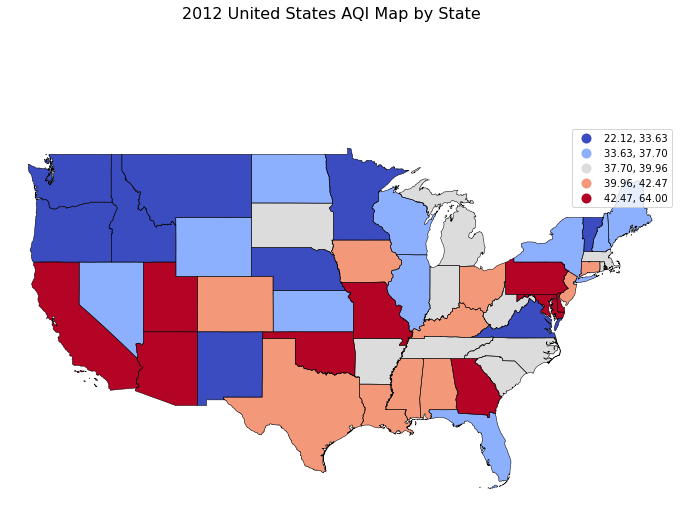

In [415]:
#plot 2012 map
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

fig.suptitle('2012 United States AQI Map by State', fontsize=16)
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
geo_merge2012.plot(ax = ax, column='Median AQI', scheme="quantiles",legend=True,cmap='coolwarm')

In [417]:
plt.close()

In [416]:
#merge dQAI2 with df from shapefile (stateMap)
geo_merge2020 = stateMap.merge(dAQI2, on='NAME' )

<AxesSubplot:title={'center':"Here's my new title"}>

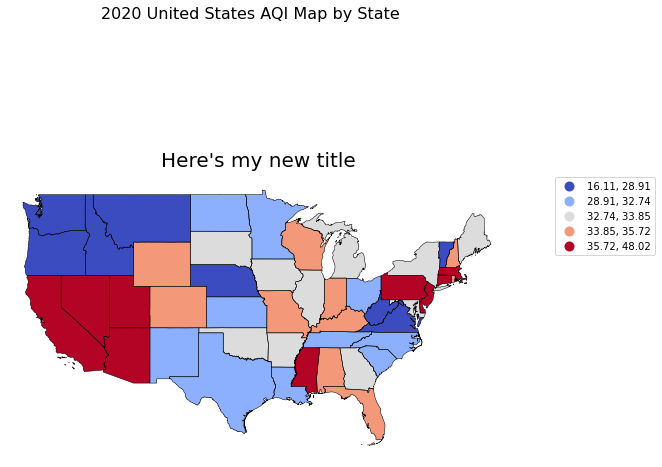

In [432]:
#plot 2020 map
fig = plt.figure(1, figsize=(9,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

plt.title("Here's my new title", fontsize = 20)
fig.suptitle('2020 United States AQI Map by State', fontsize=16)
stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
geo_merge2020.plot(ax = ax, column='Median AQI', scheme="quantiles",legend=True,cmap='coolwarm', legend_kwds={'bbox_to_anchor': (1.3, 1)})

In [420]:
plt.close()

(-14100244.0, -7200000.0, 2600000.0, 6550000.0)

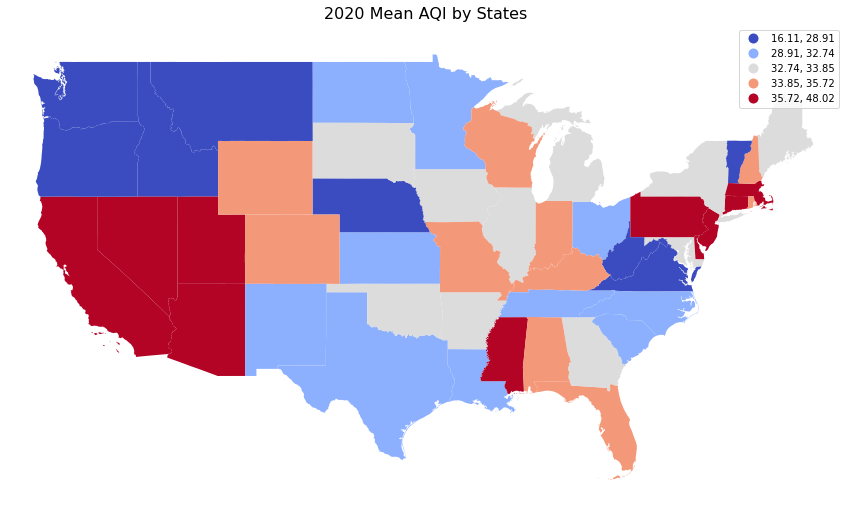

In [437]:
# plot USA map 
geo_merge2020.plot(column='Median AQI', scheme="quantiles",figsize=(15, 15),legend=True,cmap='coolwarm')
plt.xlim(-14100244, -7200000)
plt.ylim(2600000, 6550000)
# add state names and numbers 
#for i in range(len(geo_merge2020)):
#    plt.text(geo_merge2020.longitude[i],geo_merge.latitude[i],"{}\n{}".format(geo_merge2020.NAME[i],size=10)
plt.title('2020 Mean AQI by States',fontsize=16)
plt.axis('off')

Map median AQI by county for 2012 and 2020 

In [438]:
countyMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_county_5m\\cb_2014_us_county_5m.shp')
countyMap.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,01,059,00161555,0500000US01059,01059,Franklin,06,1641580723,32904833,"POLYGON Z ((-88.16591 34.38093 0.00000, -88.16..."
1,13,111,00351094,0500000US13111,13111,Fannin,06,1002370118,13560697,"POLYGON Z ((-84.62148 34.98833 0.00000, -84.50..."
2,19,109,00465243,0500000US19109,19109,Kossuth,06,2519332669,4154722,"POLYGON Z ((-94.44314 43.25501 0.00000, -94.44..."
3,40,115,01101845,0500000US40115,40115,Ottawa,06,1219467406,35708892,"POLYGON Z ((-95.03412 36.99423 0.00000, -95.00..."
4,42,115,01213688,0500000US42115,42115,Susquehanna,06,2132881515,22356541,"POLYGON Z ((-76.13120 41.99895 0.00000, -76.12..."


In [439]:
countyMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [440]:
#reproject map to Mercator
countyMap = countyMap.to_crs("EPSG:3395")

In [441]:
len(countyMap)

3233

In [443]:
countyMap['NAME'].nunique()

1921

In [444]:
countyMap['GEOID'].nunique()

3233

In [447]:
AQI2Median = AQI2Cleaned[['State', 'County', 'Median AQI']]
AQI2Median.head()

,State,County,Median AQI
0,Alabama,Baldwin,36
1,Alabama,Clay,26
2,Alabama,DeKalb,36
3,Alabama,Elmore,31
4,Alabama,Etowah,34


In [448]:
#rename county column
AQI2Median = AQI2Median.rename(columns={'County': 'NAME'})

In [450]:
#merge shapefile with usa dta 
geo_county2020=countyMap.merge(AQI2Median,on='NAME').dropna(axis=0).sort_values(by='Median AQI',ascending=False).reset_index()
geo_county2020.head()

,index,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,State,Median AQI
0,4399,29,143,00758526,0500000US29143,29143,New Madrid,06,1747828466,56291580,"POLYGON Z ((-10015690.436 4329011.303 0.000, -...",Missouri,117
1,4262,04,013,00037026,0500000US04013,04013,Maricopa,06,23826388829,64707599,"POLYGON Z ((-12616208.697 3947089.125 0.000, -...",Arizona,112
2,2995,06,071,00277300,0500000US06071,06071,San Bernardino,06,51947497395,123929658,"POLYGON Z ((-13111773.125 4005551.882 0.000, -...",California,93
3,4382,06,065,00277297,0500000US06065,06065,Riverside,06,18664548548,250935519,"POLYGON Z ((-13099664.236 3990058.313 0.000, -...",California,87
4,4128,06,037,00277283,0500000US06037,06037,Los Angeles,06,10510365728,1794809423,MULTIPOLYGON Z (((-13202867.311 3935367.958 0....,California,83


In [451]:
len(geo_county2020)

4661

(-14100244.0, -7200000.0, 2600000.0, 6550000.0)

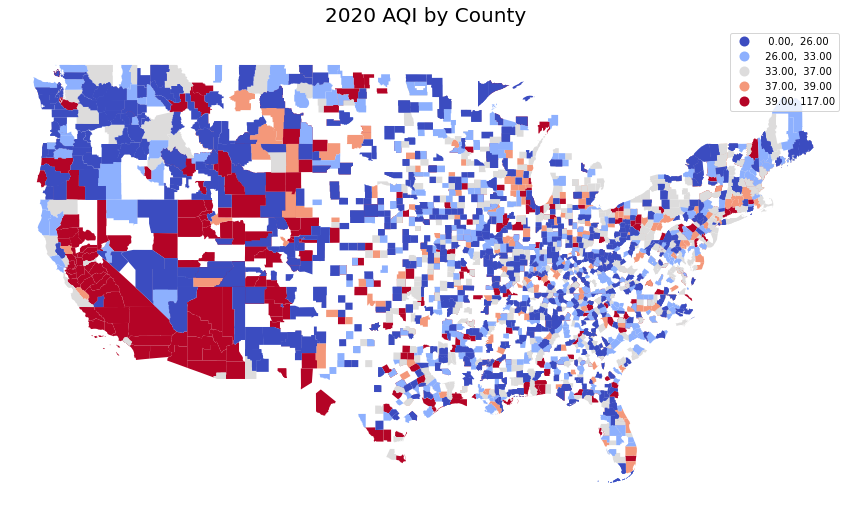

In [455]:
geo_county2020.plot(column='Median AQI',scheme="quantiles",figsize=(15, 15),cmap='coolwarm', legend=True)
#plt.xlim(-130,-60)
#plt.ylim(20,55)
plt.xlim(-14100244, -7200000)
plt.ylim(2600000, 6550000)
plt.title('2020 AQI by County',fontsize=20)
#plt.show()
plt.axis('off')

In [456]:
plt.close()

In [ ]:
#plot missing counties on map as dark grey
world.plot(column='pop_est', missing_kwds={'color': 'grey'});

world.plot(
    column="pop_est",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "grey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

In [460]:
geo_county2020Updated=countyMap.merge(AQI2Median,on='NAME').sort_values(by='Median AQI',ascending=False).reset_index()
geo_county2020Updated.head()

,index,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,State,Median AQI
0,4399,29,143,00758526,0500000US29143,29143,New Madrid,06,1747828466,56291580,"POLYGON Z ((-10015690.436 4329011.303 0.000, -...",Missouri,117
1,4262,04,013,00037026,0500000US04013,04013,Maricopa,06,23826388829,64707599,"POLYGON Z ((-12616208.697 3947089.125 0.000, -...",Arizona,112
2,2995,06,071,00277300,0500000US06071,06071,San Bernardino,06,51947497395,123929658,"POLYGON Z ((-13111773.125 4005551.882 0.000, -...",California,93
3,4382,06,065,00277297,0500000US06065,06065,Riverside,06,18664548548,250935519,"POLYGON Z ((-13099664.236 3990058.313 0.000, -...",California,87
4,4128,06,037,00277283,0500000US06037,06037,Los Angeles,06,10510365728,1794809423,MULTIPOLYGON Z (((-13202867.311 3935367.958 0....,California,83


In [469]:
sorted = geo_county2020Updated.sort_values('Median AQI')

In [473]:
sorted[:50]

,index,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,State,Median AQI
4660,3073,08,045,00198138,0500000US08045,08045,Garfield,06,7634470433,21430768,"POLYGON Z ((-12139542.193 4766033.829 0.000, -...",Oklahoma,0
4639,573,18,059,00450357,0500000US18059,18059,Hancock,06,792580890,2610509,"POLYGON Z ((-9568320.223 4817667.141 0.000, -9...",Ohio,0
4638,558,19,081,00465229,0500000US19081,19081,Hancock,06,1478894986,5265568,"POLYGON Z ((-10460738.747 5321631.718 0.000, -...",Ohio,0
4637,4164,37,013,01026333,0500000US37013,37013,Beaufort,06,2143054135,338699325,"POLYGON Z ((-8592280.056 4237182.459 0.000, -8...",North Carolina,0
4636,4402,13,219,00356774,0500000US13219,13219,Oconee,06,477395755,5305653,"POLYGON Z ((-9311544.897 3992378.842 0.000, -9...",South Carolina,0
4635,3055,16,071,00399759,0500000US16071,16071,Oneida,06,3107945435,3995182,"POLYGON Z ((-12579194.076 5181381.386 0.000, -...",Wisconsin,0
4634,3057,36,065,00974131,0500000US36065,36065,Oneida,06,3140111003,117137923,"POLYGON Z ((-8447675.036 5332247.686 0.000, -8...",Wisconsin,0
4633,3053,55,085,01581103,0500000US55085,55085,Oneida,06,2883897978,318619271,"POLYGON Z ((-10023785.590 5720521.028 0.000, -...",Wisconsin,0
4632,4309,48,449,01384010,0500000US48449,48449,Titus,06,1051675990,50735385,"POLYGON Z ((-10589316.767 3923598.713 0.000, -...",Texas,0
4631,3093,40,047,01101811,0500000US40047,40047,Garfield,06,2741478922,4075930,"POLYGON Z ((-10920919.162 4357133.411 0.000, -...",Oklahoma,0


UnboundLocalError: local variable 'merged_kwds' referenced before assignment

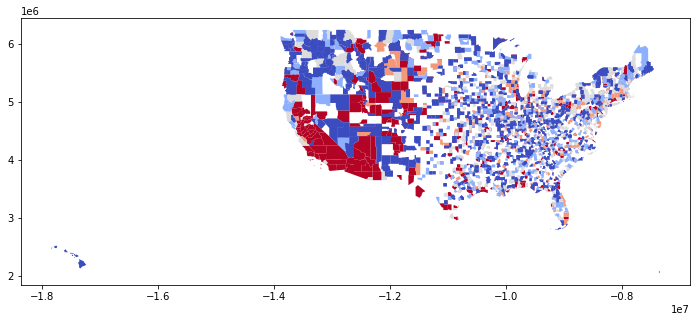

In [466]:
#TO DO plot missing counties on map as dark grey. THIS ISN'T WORKING YET
#https://stackoverflow.com/questions/58014486/use-geopandas-plot-missing-values
#https://geopandas.org/en/stable/docs/user_guide/mapping.html
fig, ax = plt.subplots(figsize=(12, 10))
missing_kwds=dict(color='grey', label='No Data')
                    
geo_county2020Updated.plot(
    column='Median AQI',
    scheme="quantiles",
    legend=True,
    #figsize=(15, 15),
    cmap='coolwarm',  
    missing_kwds=missing_kwds,
    ax=ax)

#plt.xlim(-130,-60)
#plt.ylim(20,55)
plt.xlim(-14100244, -7200000)
plt.ylim(2600000, 6550000)
plt.title('2020 AQI by County',fontsize=20)
#plt.show()
plt.axis('off')

In [ ]:
plt.close()

In [ ]:
#POSSIBLY MERGING DATA ON COUNTY NAME ISN"T WORKING CORRECTLY. MAY NEED TO ADD STATE FIP AND COUNTY FIP (and then GEOID) to dataframe